<a href="https://colab.research.google.com/github/campbellmath001/ARATRAWP/blob/main/ARATRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Graph each of the following partial sums of Fourier's Expansion over the interval $ -1 \le x \le 3 $.



1.   $$\frac{4}{\pi}\cos{\left(\frac{\pi x}{2}\right)}$$
2.  



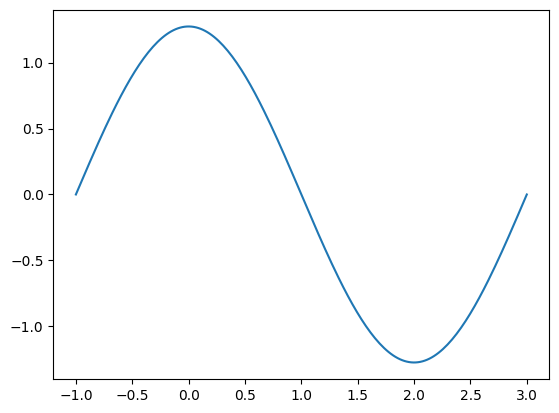

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

start = -1
stop = 3
N = 200


x = np.linspace(start,stop,N,endpoint=True)

p1 = (4/np.pi)*np.cos(np.multiply((np.pi/2), x))

plt.plot(x,p1)


xcoeff shape:  (3,)
M shape:  (2000, 3)
cos_coeff shape:  (3,)


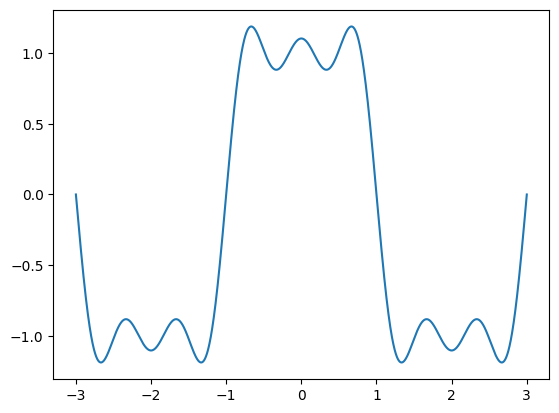

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#create the input x values
start = -3
stop = 3
N = 2000


x = np.linspace(start,stop,N,endpoint=True)

#create an array of coefficients that multiply  each x before a cosine is computed

#n Determines the partial sum to compute
n = 3

#these are the coefficients for each x value
xcoeff = np.array([((2*i - 1)*np.pi)/2 for i in range(1,n+1)])
print('xcoeff shape: ',xcoeff.shape)
#The (200,1) array of x values is stretched to a 200xn array and the n xcoeff are broadcast to each x value
M = x.reshape(x.shape[0], 1)*xcoeff
print('M shape: ' , M.shape)

#these are the coefficients of the cosines in the sum
cos_coeff = np.array([((-1)**(i - 1))/(2*i - 1) for i in range(1,n+1)])
print('cos_coeff shape: ', cos_coeff.shape)

#sum up the array for each x value to determine the value of the function at x
f_x = (4/np.pi)*np.sum((cos_coeff*np.cos(M)), axis = 1)

plt.plot(x,f_x)

In [ ]:
# How to generate he coefficients with broadcasting instead of looping
import numpy as np
n = 10

xcoeff = np.array([((2*i - 1)*np.pi)/2 for i in range(1,n+1)])

xcoeffbroadcast = (1/2)*np.pi*(2*np.arange(1,n+1) - 1)

print(xcoeff)
print(xcoeffbroadcast)


[ 1.57079633  4.71238898  7.85398163 10.99557429 14.13716694 17.27875959
 20.42035225 23.5619449  26.70353756 29.84513021]
[ 1.57079633  4.71238898  7.85398163 10.99557429 14.13716694 17.27875959
 20.42035225 23.5619449  26.70353756 29.84513021]


Compute $$F_{n}(x) = \frac{4}{\pi}\left[\cos\left(\frac{\pi x}{2}\right) - \frac{1}{3}\cos\left(\frac{3\pi}{2}x\right) + \cdots + \frac{(-1)^{n-1}}{2n - 1}\cos\left(\frac{(2n-1)\pi}{2}x\right)\right]$$
For various values of n and x

In [ ]:
import numpy as np
def F(n,x):
  """
  Compute the nth partial sum of Fourier's Series to approximate f(x) = 1 on (-1,1)
  Args:
    n:The partial sum you want to compute
    x:the point to evaluate the series
  """
  xcoeff = np.array([((2*i - 1)*np.pi)/2 for i in range(1,n+1)])
  # xcoeff = (2*np.arange(1,n+1) - 1)*np.pi*(1/2)
  cos_coeff = np.array([((-1)**(i - 1))/(2*i - 1) for i in range(1,n+1)])
  # cos_coeff = (-1)**(np.arange(1, n+1) -1)/(2*np.arange(1,n+1) - 1)

  S = (4/np.pi)*np.sum(cos_coeff*np.cos(xcoeff*x))

  return S

def Fb(n,x):
  """
  F(n,x) with broadcasting instead of looping
  Compute the nth partial sum of Fourier's Series to approximate f(x) = 1 on (-1,1)
  Args:
    n:The partial sum you want to compute
    x:the point to evaluate the series
  """
  # xcoeff = np.array([((2*i - 1)*np.pi)/2 for i in range(1,n+1)])
  xcoeff = (2*np.arange(1,n+1) - 1)*np.pi*(1/2)
  # cos_coeff = np.array([((-1)**(i - 1))/(2*i - 1) for i in range(1,n+1)])
  cos_coeff = (-1)**(np.arange(1, n+1) -1)/(2*np.arange(1,n+1) - 1)

  S = (4/np.pi)*np.sum(cos_coeff*np.cos(xcoeff*x))

  return S

print(F(10, 0.5), Fb(10,0.5))
print(F(10, 0.8), Fb(10,0.8))




1.044692622711115 1.044692622711115
0.9011402779684271 0.9011402779684271


Investigate the behavior of the infinite series $$1 + \frac{1}{3} + \frac{1}{5} + \cdots + \frac{1}{2n - 1}$$


the 320th partial sum is: 3.8659157143577687 


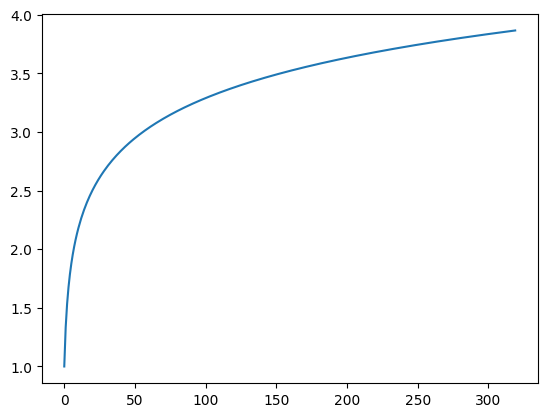

In [ ]:
import numpy as np
N = 320
y = np.array([1/(2*n-1) for n in range(1, N+1)])
plt.plot(np.cumsum(y))
print(f'the {N}th partial sum is: {np.cumsum(y)[-1]} ')

the 640th partial sum is: 4.21248915205017 


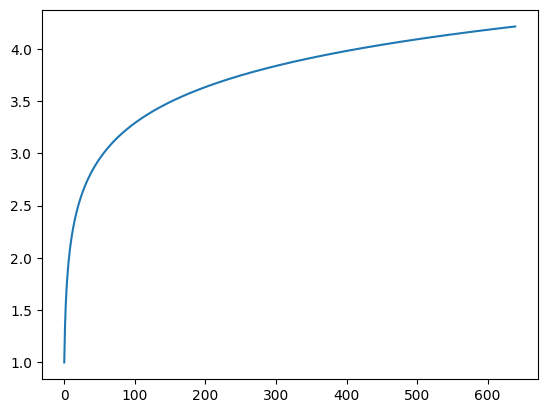

In [ ]:
N = 640
y = np.array([1/(2*n-1) for n in range(1, N+1)])
plt.plot(np.cumsum(y))
print(f'the {N}th partial sum is: {np.cumsum(y)[-1]} ')

the 10th partial sum is: 2.1332555301595546 
the 20th partial sum is: 2.4796732103645347 
the 30th partial sum is: 2.682376847491542 
the 40th partial sum is: 2.826207759477328 
the 50th partial sum is: 2.937774848474907 
the 60th partial sum is: 3.028933080877525 
the 70th partial sum is: 3.1060068855842404 
the 80th partial sum is: 3.1727715854669825 
the 90th partial sum is: 3.2316624201367388 
the 100th partial sum is: 3.2843421893016322 
the 110th partial sum is: 3.331996917645103 
the 120th partial sum is: 3.3755023311434105 
the 130th partial sum is: 3.415523470967354 
the 140th partial sum is: 3.4525772872310423 
the 150th partial sum is: 3.487073585977563 
the 160th partial sum is: 3.5193427344241446 
the 170th partial sum is: 3.5496549524080625 
the 180th partial sum is: 3.578234081456458 
the 190th partial sum is: 3.605267626188803 
the 200th partial sum is: 3.6309142171157838 


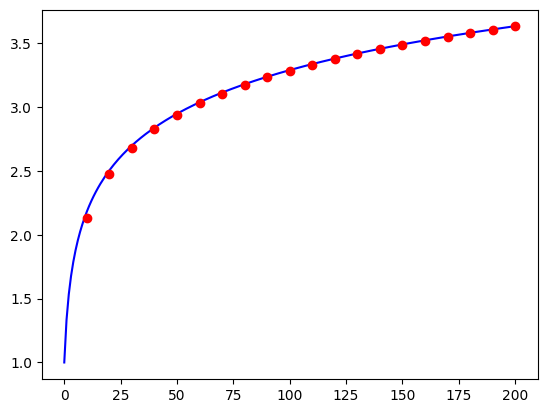

In [ ]:
N = range(10, 210, 10)
y = np.array([1/(2*n-1) for n in range(1, np.max(N)+1)])
plt.plot(np.cumsum(y),'b')
for i in N:
  plt.plot(i,np.cumsum(y)[i - 1], 'ro')
  print(f'the {i}th partial sum is: {np.cumsum(y)[i-1]} ')


Plot the Solution series


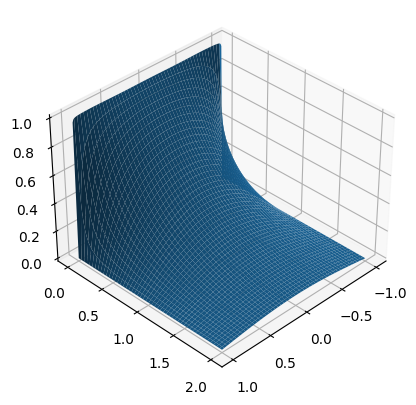

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#create the input x values
startx = -1
stopx = 1
startw = 0
stopw = 2
Nx = 200
Nw = 200

x = np.linspace(startx,stopx,Nx,endpoint=True)
w = np.linspace(startw,stopw,Nw,endpoint=True)

X,W = np.meshgrid(x,w)

n = 600
xcoeff = np.array([((2*i - 1)*np.pi)/2 for i in range(1,n+1)])
wcoeff = -1*np.array([((2*i - 1)*np.pi)/2 for i in range(1,n+1)])
cos_coeff = np.array([((-1)**(i - 1))/(2*i - 1) for i in range(1,n+1)])

M1 = np.cos(X[:,:,np.newaxis]*xcoeff)
M2 = np.exp(W[:,:,np.newaxis]*wcoeff)


Z = (4/np.pi)*(np.sum(cos_coeff*M1*M2, axis = 2))

ax = plt.figure().add_subplot(projection='3d')
ax.view_init(35, 45)
ax.plot_surface(X,W,Z)